In [1]:
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train #x ko rkh ky y predict krngy

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_name  = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boat']

# Data Exploration

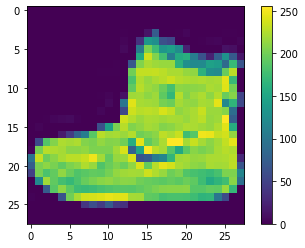

In [9]:
plt.imshow(x_train[0])
plt.colorbar()

In [10]:
x_train = x_train/255.0

In [11]:
x_test = x_test/255.0

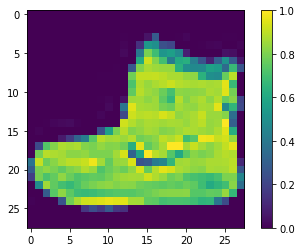

In [12]:
plt.imshow(x_train[0])
plt.colorbar()

### 28x28 represent the block in image of each pixel

# Machine Learning model

In [39]:
from keras import Sequential
from keras.layers import Flatten, Dense # flattern as first layer and then dense layer
#flatten convert the array into one dimension

In [40]:
model =  Sequential()
model.add(Flatten(input_shape = (28,28,)))
model.add(Dense(128,activation ='relu'))
model.add(Dense(10,activation = 'sigmoid'))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Model complation
- loss function
- optimizer
- metrics

In [42]:
model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [43]:
history = model.fit(x_train,y_train,epochs=10, batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 23s 482us/step - loss: 0.5179 - accuracy: 0.8179 - val_loss: 0.4083 - val_accuracy: 0.8580
Epoch 2/10
48000/48000 [==============================] - 20s 424us/step - loss: 0.3807 - accuracy: 0.8625 - val_loss: 0.3871 - val_accuracy: 0.8631
Epoch 3/10
48000/48000 [==============================] - 25s 527us/step - loss: 0.3437 - accuracy: 0.8731 - val_loss: 0.3591 - val_accuracy: 0.8723
Epoch 4/10
48000/48000 [==============================] - 24s 493us/step - loss: 0.3176 - accuracy: 0.8840 - val_loss: 0.3541 - val_accuracy: 0.8753
Epoch 5/10
48000/48000 [==============================] - 22s 455us/step - loss: 0.2992 - accuracy: 0.8899 - val_loss: 0.3538 - val_accuracy: 0.8811
Epoch 6/10
48000/48000 [==============================] - 26s 539us/step - loss: 0.2830 - accuracy: 0.8950 - val_loss: 0.3408 - val_accuracy: 0.8783
Epoch 7/10
48000/48000 [==============================] 

In [19]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print(test_acc)

10000/10000 [==============================] - 1s 91us/step
0.8774999976158142


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred = model.predict_classes(x_test)
#predic_classes predict the which class and predict will predict set of array which is a continous value

In [23]:
accuracy_score(y_test,y_pred)

0.8775

In [24]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [25]:
pred= model.predict(x_test)

In [26]:
np.argmax(pred[1])

2

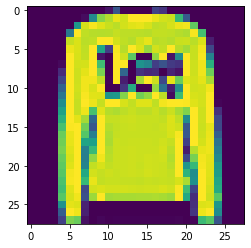

In [27]:
plt.imshow(x_test[1])

In [28]:
help(model)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |      name: Name given to the model
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model

In [44]:
history.history

{'val_loss': [0.4083063828099209,
  0.38705052808780843,
  0.35913967446249445,
  0.354058256764741,
  0.353823417807677,
  0.3407570247016459,
  0.35852570864362254,
  0.35799200946339016,
  0.32881691098252,
  0.33812625680933706],
 'val_accuracy': [0.8579999804496765,
  0.8630833625793457,
  0.8723333477973938,
  0.875333309173584,
  0.8810833096504211,
  0.878250002861023,
  0.8805833458900452,
  0.8745833039283752,
  0.8901666402816772,
  0.8837500214576721],
 'loss': [0.5179285485707805,
  0.3806717700182344,
  0.3437184875649109,
  0.3176386346203314,
  0.299207394515106,
  0.28302992523448967,
  0.2717197363442392,
  0.2609471516363919,
  0.2513018824780678,
  0.2451161398833786],
 'accuracy': [0.8179375,
  0.8625,
  0.8730625,
  0.88395834,
  0.88991666,
  0.8949583,
  0.8995417,
  0.90272915,
  0.9059167,
  0.90729165]}

In [45]:
import matplotlib.pyplot as plt

# Learning curve

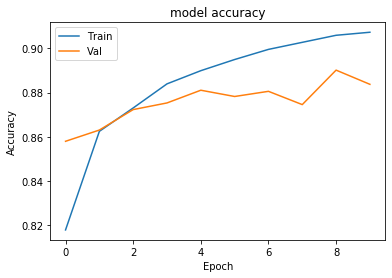

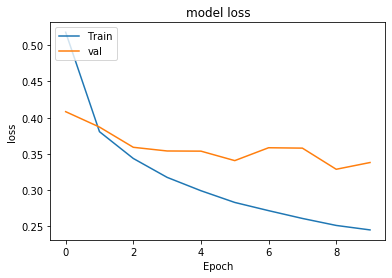

In [48]:
#plt training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt .title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

# Plot confusion Matrix

In [50]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x131241080>)

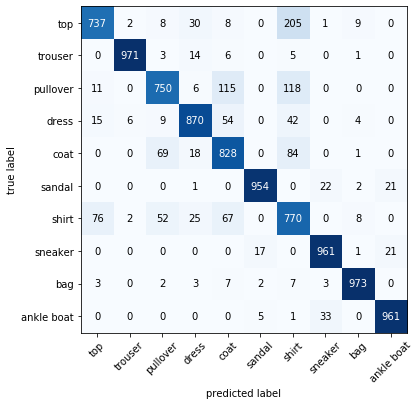

In [53]:
mat= confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(6,6),class_names=class_name)